## 今天的作業
在鐵達尼資料集中，今天我們專注觀察變數之間的相關性，以Titanic_train.csv 中，首先將有遺失值的數值刪除，我們取 Titanic_train.csv 的年齡資料，試著將課堂中所學的方法應用上去。

* Q1: 產生一個新的變數(Age_above65_) Age>=65為 'Y'，其餘為'N'。  
* Q2: 添加女性和男性，產生一個新的變數(Age_above65_female)，女性或Age>=65為'Y'，其餘為'N'。  
*  Q3: 透過昨天課程的內容，驗證產生的兩個新變數，哪一個和目標變數(Survived_cate)的相關性較高?

In [1]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import researchpy

# #顯示所有行
# pd.set_option('display.max_columns', None)
# #顯示所有列
# pd.set_option('display.max_rows', None)
# #顯示行設定
# pd.set_option('max_colwidth',100)

## 讀入資料

In [2]:
df_train = pd.read_csv("./D36-41 探索性資料分析 (EDA)_Dataset/Titanic_train.csv")
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
# 1.產稱一個新的變數 Survived_cate ，資料型態傳換成類別型態      
# 2.把題目中的 Survived 用 Survived_cate 來做分析    
df_train['Survived_cate']=df_train['Survived'].astype('object')
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  Survived_cate  891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
None


In [4]:
# 取出資料後，把遺失值刪除
data=df_train[['Age','Survived_cate','Sex']].dropna()
display(data)

,Age,Survived_cate,Sex
0,22.0,0,male
1,38.0,1,female
2,26.0,1,female
3,35.0,1,female
4,35.0,0,male
...,...,...,...
885,39.0,0,female
886,27.0,0,male
887,19.0,1,female
889,26.0,1,male


### Q1: 產生一個新的變數(Age_above65_) Age>=65為 'Y'，其餘為'N'。


In [5]:
data['Age_above65']=data['Age'].apply((lambda x: 'Y' if x >= 65 else 'N'))
display(data[data['Age_above65'] == 'Y'])

,Age,Survived_cate,Sex,Age_above65
33,66.0,0,male,Y
54,65.0,0,male,Y
96,71.0,0,male,Y
116,70.5,0,male,Y
280,65.0,0,male,Y
456,65.0,0,male,Y
493,71.0,0,male,Y
630,80.0,1,male,Y
672,70.0,0,male,Y
745,70.0,0,male,Y


### Q2: 添加女性和男性，產生一個新的變數(Age_above65_female)，女性或Age>=65為'Y'，其餘為'N'。
* 暗示: 觀看下面影片找答案，https://www.youtube.com/watch?v=X2d-wUt5azY

In [6]:
data['Age_above65_female'] = data[['Age','Sex']].apply((lambda x: 'Y' if x.Sex == 'female' or x.Age >=65  else 'N'), axis = 1)
display(data[data['Age_above65_female'] == 'Y'])
display(data[data['Age_above65'] == 'Y'])

,Age,Survived_cate,Sex,Age_above65,Age_above65_female
1,38.0,1,female,N,Y
2,26.0,1,female,N,Y
3,35.0,1,female,N,Y
8,27.0,1,female,N,Y
9,14.0,1,female,N,Y
...,...,...,...,...,...
879,56.0,1,female,N,Y
880,25.0,1,female,N,Y
882,22.0,0,female,N,Y
885,39.0,0,female,N,Y


,Age,Survived_cate,Sex,Age_above65,Age_above65_female
33,66.0,0,male,Y,Y
54,65.0,0,male,Y,Y
96,71.0,0,male,Y,Y
116,70.5,0,male,Y,Y
280,65.0,0,male,Y,Y
456,65.0,0,male,Y,Y
493,71.0,0,male,Y,Y
630,80.0,1,male,Y,Y
672,70.0,0,male,Y,Y
745,70.0,0,male,Y,Y


### Q3: 透過昨天課程的內容，驗證產生的兩個新變數，哪一個和目標變數(Survived_cate)的相關性較高?
* 提示:    
  首先觀察一下這些變數的資料型態後，再來想要以哪一種判斷倆倆的相關性。     

In [7]:
def judgment_CramerV(tag):
    df = globals()['df_' + tag] if globals()['df_' + tag] in range(1,5) else 5
    for case in {1: {'Negligible': .1,
                     'Small': .3,
                     'Medium': .5},
                 2: {'Negligible': .07,
                     'Small': .21,
                     'Medium': .35},
                 3: {'Negligible': .06,
                     'Small': .17,
                     'Medium': .29},
                 4: {'Negligible': .05,
                     'Small': .15,
                     'Medium': .25},
                 5: {'Negligible': .05,
                     'Small': .13,
                     'Medium': .22}}.items():
            for condition in case[df].items():
                if globals()['CramerV_' + tag] < condition[1]:
                    return condition[0]
    return 'Large'

In [8]:
for i,tag in enumerate(['Age_above65','Age_above65_female']):
    if i: print('\n'*3)
        
    # 用交叉列連表(contingency table)，來整理兩個類別型的資料
    contTable = pd.crosstab(data['Survived_cate'], data[tag])
    display(contTable)
   
    # 計算資料自由度 df*
    globals()['df_' + tag] = min(contTable.shape[0], contTable.shape[1]) - 1
    print('df:',globals()['df_'+tag])
    
    # 計算 Cramer’s V 係數
    rosstab, res = researchpy.crosstab(data['Survived_cate'], data[tag], test='chi-square')
    globals()['CramerV_' + tag] = res.loc[2, 'results']
    print(res, "\n\nCramer's value is", globals()['CramerV_' + tag])
    print('The size of a CramerV:', judgment_CramerV(tag))


Age_above65,N,Y
Survived_cate,,
0,414,10
1,289,1


df: 1
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    4.6035
1                    p-value =    0.0319
2               Cramer's phi =    0.0803 

Cramer's value is 0.0803
The size of a CramerV: Negligible






Age_above65_female,N,Y
Survived_cate,,
0,350,74
1,92,198


df: 1
                Chi-square test   results
0  Pearson Chi-square ( 1.0) =   188.6219
1                    p-value =     0.0000
2               Cramer's phi =     0.5140 

Cramer's value is 0.514
The size of a CramerV: Large


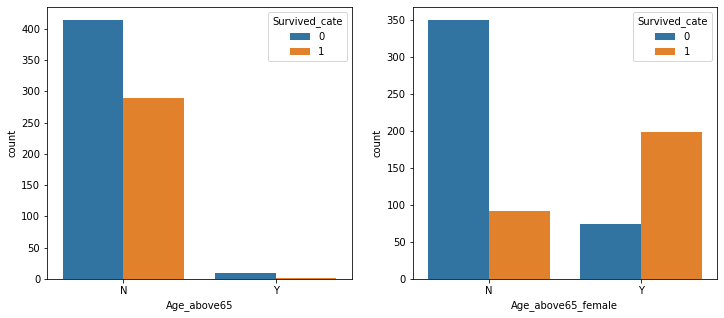

In [9]:
# 畫圖比較
f, [ax1, ax2] = plt.subplots(1,2, figsize=(12,5))
sns.countplot(x='Age_above65', hue='Survived_cate', data=data, ax=ax1)
sns.countplot(x='Age_above65_female', hue='Survived_cate', data=data, ax=ax2)
plt.show()